In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dados_tcc.csv', sep=';')
df['ds'] = df['ds'].str.replace('/', '-')
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')
df

,ds,y
0,2015-01-31,642
1,2015-02-28,590
2,2015-03-31,849
3,2015-04-30,1271
4,2015-05-31,1585
...,...,...
74,2021-03-31,26373
75,2021-04-30,28130
76,2021-05-31,29576
77,2021-06-30,30588


In [3]:
hw = ExponentialSmoothing(df['y'], trend='add', seasonal='mul', seasonal_periods=6).fit()
hw_forecast = hw.predict(0,len(df)-1)
hw_forecast

0      1418.931494
1       398.714703
2       429.946920
3       901.793287
4      1589.250315
          ...     
74    27158.250487
75    28048.260194
76    29110.235269
77    29529.213740
78    29502.613115
Length: 79, dtype: float64

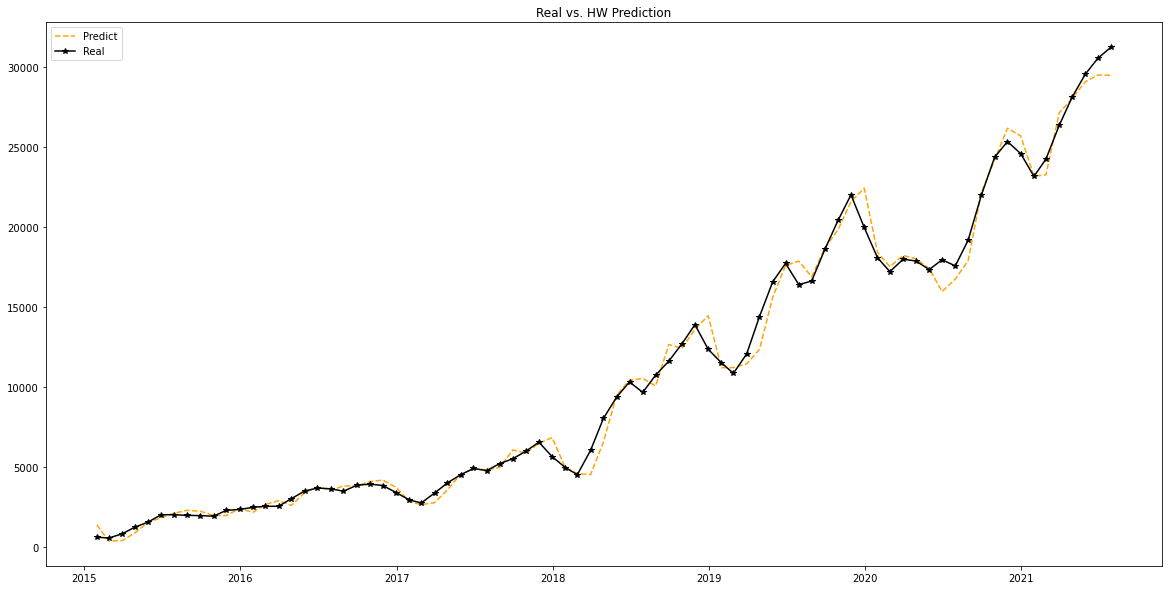

In [4]:
plt.figure(figsize=(20,10))
plt.title('Real vs. HW Prediction')

fig1 = plt.plot(df['ds'], hw_forecast, '--', color='orange', label='Predict')
fig2 = plt.plot(df['ds'], df['y'], '*-', color='black', label='Real')

plt.legend()
plt.show()

In [5]:
mse = metrics.mean_squared_error(df['y'], hw_forecast)
rmse = metrics.mean_squared_error(df['y'], hw_forecast, squared=False)
mad = metrics.mean_absolute_error(df['y'], hw_forecast)
mape = metrics.mean_absolute_percentage_error(df['y'], hw_forecast)

print(f'''
      EQM: {round(mse,2)}
      REQM: {round(rmse,2)}
      MAD: {round(mad,2)}
      MAPE: {round(mape*100,2)}%
      ''')


      EQM: 568521.4
      REQM: 754.0
      MAD: 508.19
      MAPE: 8.42%
      
